In [1]:
%load_ext autoreload
%autoreload 2

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
    
from src.ask import ask, load_llm


In [2]:
llm = load_llm()

# Loading an example

In [3]:
with open("taxonomy/example/iso_bot.md","r") as f:
    txt = f.read()

printmd("###"+txt)

#### The ISO37101 bot.

Description: The iso37101 bot is a solution that helps iso auditors prepare audits of cities and mapping of their vision and strategy on the iso37101 reference framework.

The use of the tool aims at making auditors more efficient, especially when processing large texts and large number of texts.

Processes: The tool takes texts as inputs. It processes them using python, and the langchain and openai libraries. The UI is managed using the streamlit tool, and users receive excel sheets and images as outputs. The excel sheet contains the review of the different text, and the audit results under the form of a table. The image(s) are the image of visual representation of the mapping on the ISO37101 reference framework. As such, it uses the ISO standard definitions for all terms used. It optionally can produce Word documents using the template or visual identity of a given client. The processing is using OpenAI model, especially gpt3.5-turbo.

Technically, the tool uses openai "functions calling" to classify text. It also uses LLMs to write up audits results, and explanations of the audit results.

Architecture: The tool uses the streamlit.io platform to deploy webapps. It can also be deployed on any platform using the docker solution to deploy containerized solutions.

# Analysing the text

In [4]:
PROMPT = """# Objective\n\nYou are looking at the 'text to review' below. Answer with the following bullet points (with no trailing '.'):

* Problem statement: Write a short paragraph about the problem the idea or the solution described aims at solving.
* Title: Up to five words maximum about the problem it solves.
* Capabilities: answer with a comma-separated list of 'digital capabilities' required. They can be things like: natural language processing, 3D modelling, data analysis, webscraping, webapps, ... . 
* Technologies: answer with a comma-separated list of required digital technologies (librairies, software,  SaaS, APIs, ...) listed in the text. If there are none, leave empty.
* Data: answer with a comma-separated list of required data sources listed in the text. If there are none, leave empty.
* Infrastructure: answer with a comma-separated list of the technical infrastructure needs possibly listed in the text. If there are none, leave empty.
* Outputs: answer with a comma-separated list of the outputs listed in the text.  If there are none, leave empty.
* Outcomes:  answer with a comma-separated list of the benefits listed in the text. They are the benefits generated by the outputs listed earlier.  If there are none, leave empty.

"""

ans = ask(llm,question=PROMPT+"\n\n# Text to review \n\n"+txt)
printmd(ans)

* Problem statement: The iso37101 bot aims to improve the efficiency of city auditors by automating the process of preparing audits and mapping visions and strategies onto the iso37101 reference framework.
* Title: Automating city audits and mapping.
* Capabilities: Natural language processing, libraries, software, data analysis, webapps.
* Technologies: Python, langchain, openai, streamlit, docker.
* Data: Texts.
* Infrastructure: Docker container.
* Outputs: Excel sheets, images, Word documents (optional).
* Outcomes: Improved efficiency for city auditors.

# Wardley map

In [151]:
import wardley_map
# Define the structure of your Wardley Map using a string.
map_definition = """title Automating city audits and mapping.
component Improved efficiency for city auditors.  [0.97, 0.35]  label [5, 5]
anchor City Expert [0.9, 0.47] label [5, 5]
Improved efficiency for city auditors.  -> City Expert 

component Automated city audits and mapping [0.85, 0.50]  label [5, 5]
City Expert  -> Automated city audits and mapping

component UI [0.8, 0.8]  label [5, 5]
component ISO37101 tool [0.75, 0.3]  label [-20, 20]
Automated city audits and mapping  -> UI
Automated city audits and mapping  ->  ISO37101 tool
component Data processing [0.70, 0.65]  label [5, 5]
component Natural language processing [0.64, 0.55]  label [5, 5]
ISO37101 tool ->  Data processing
Data processing ->  Natural language processing
component Data [0.60, 0.2] label [20, 0]
component Text data [0.55, 0.2] label [20, 0]
component ISO37101 definitions [0.30, 0.2]  label [5, 5]
component Historical data [0.30, 0.05]  label [5, 5]
ISO37101 tool -> Data
Data -> Text data
Text data -> ISO37101 definitions

component Webapp [0.3, 0.69]  label [5, 5]
component Python [0.2, 0.95]  label [5, 5]
component Langchain [0.5, 0.6]  label [5, 5]
component Streamlit [0.3, 0.85]  label [5, 5]
component LLMs [0.6, 0.55]  label [5, 5]
component OpenAI [0.45, 0.6]  label [5, 5]
component Prompts [0.50, 0.25]   label [5, -16]

component LLMs scoring tools [0.4, 0.4]  label [-20, -20]
component LLMs guardrails [0.4, 0.5]  label [-20, -20]

Natural language processing ->LLMs 
LLMs -> Langchain
LLMs -> LLMs scoring tools
LLMs -> LLMs guardrails
Langchain -> OpenAI
Data -> Text data
Text data -> Prompts
Text data -> Historical data
LLMs -> Prompts
UI -> Webapp

component Docker [0.15, 0.75]  label [5, 5]
component Streamlit.io [0.1, 0.80]  label [5, 5]
component Workspaces [0.1, 0.1] label [19, -15]
component Safe architecture [0.15, 0.3] label [19, -15]

UI -> Streamlit 
Streamlit -> Streamlit.io
Website -> Hosting

Webapp -> Docker

LLMs guardrails -> Safe architecture
Webapp -> Safe architecture
Safe architecture -> Workspaces

component FastAPI backend [0.35, 0.65]  label [5, 5]
component Quality pipeline [0.3, 0.35]  label [5, 5]
FastAPI backend -> Safe architecture
Data processing -> FastAPI backend
LLMs scoring tools -> Quality pipeline
Quality pipeline -> Safe architecture
"""
map, map_plot = wardley_map.create_wardley_map_plot(map_definition)

DEBUG: Initializing with input: title Automating city audits and mapping.
component Improved efficiency for city auditors.  [0.97, 0.35]  label [5, 5]
anchor City Expert [0.9, 0.47] label [5, 5]
Improved efficiency for city auditors.  -> City Expert 

component Automated city audits and mapping [0.85, 0.50]  label [5, 5]
City Expert  -> Automated city audits and mapping

component UI [0.8, 0.8]  label [5, 5]
component ISO37101 tool [0.75, 0.3]  label [-20, 20]
Automated city audits and mapping  -> UI
Automated city audits and mapping  ->  ISO37101 tool
component Data processing [0.70, 0.65]  label [5, 5]
component Natural language processing [0.64, 0.55]  label [5, 5]
ISO37101 tool ->  Data processing
Data processing ->  Natural language processing
component Data [0.60, 0.2] label [20, 0]
component Text data [0.55, 0.2] label [20, 0]
component ISO37101 definitions [0.30, 0.2]  label [5, 5]
component Historical data [0.30, 0.05]  label [5, 5]
ISO37101 tool -> Data
Data -> Text data
Text

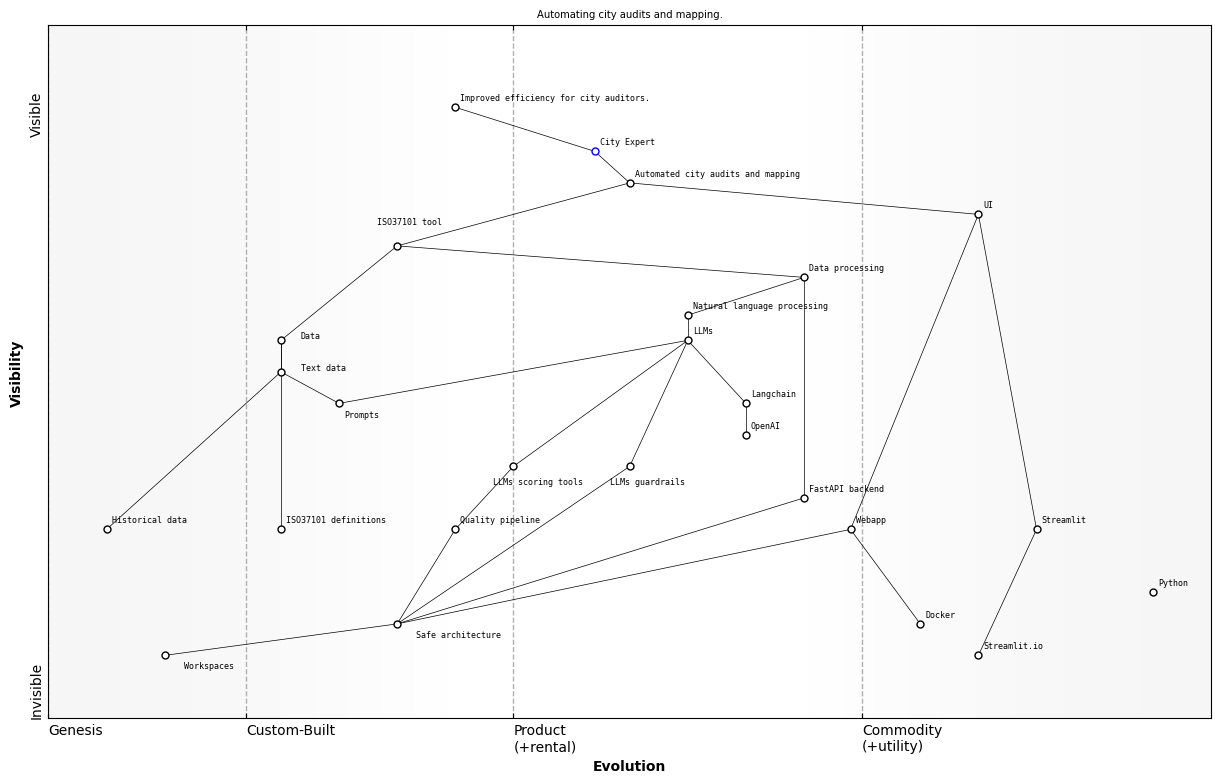

In [152]:
map_plot

# Parking space

In [5]:
from src.embed import load_db
# https://medium.com/@Kishore-B/building-rag-application-using-langchain-openai-faiss-3b2af23d98ba